In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm, catboost as catb

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**Построение модели классификации**
1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

**Прогнозирование на тестовом датасете**
1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
4. Соблюдать исходный порядок примеров из тестового датасета

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [3]:
train=pd.read_csv('course_project_train.csv')
test=pd.read_csv('course_project_test.csv')

In [4]:
train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.00,NaN,0.00,11.00,26.30,685960.00,1.00,nan,1.00,debt consolidation,Short Term,99999999.00,47386.00,7914.00,749.00,0
1,Own Home,1025487.00,10+ years,0.00,15.00,15.30,1181730.00,0.00,nan,0.00,debt consolidation,Long Term,264968.00,394972.00,18373.00,737.00,1
2,Home Mortgage,751412.00,8 years,0.00,11.00,35.00,1182434.00,0.00,nan,0.00,debt consolidation,Short Term,99999999.00,308389.00,13651.00,742.00,0
3,Own Home,805068.00,6 years,0.00,8.00,22.50,147400.00,1.00,nan,1.00,debt consolidation,Short Term,121396.00,95855.00,11338.00,694.00,0
4,Rent,776264.00,8 years,0.00,13.00,13.60,385836.00,1.00,nan,0.00,debt consolidation,Short Term,125840.00,93309.00,7180.00,719.00,0


In [5]:
test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,nan,4 years,0.00,9.00,12.50,220968.00,0.00,70.00,0.00,debt consolidation,Short Term,162470.00,105906.00,6813.00,nan
1,Rent,231838.00,1 year,0.00,6.00,32.70,55946.00,0.00,8.00,0.00,educational expenses,Short Term,78298.00,46037.00,2318.00,699.00
2,Home Mortgage,1152540.00,3 years,0.00,10.00,13.70,204600.00,0.00,nan,0.00,debt consolidation,Short Term,200178.00,146490.00,18729.00,7260.00
3,Home Mortgage,1220313.00,10+ years,0.00,16.00,17.00,456302.00,0.00,70.00,0.00,debt consolidation,Short Term,217382.00,213199.00,27559.00,739.00
4,Home Mortgage,2340952.00,6 years,0.00,11.00,23.60,1207272.00,0.00,nan,0.00,debt consolidation,Long Term,777634.00,425391.00,42605.00,706.00


In [6]:
train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5943.00,7500.00,7500.00,7500.00,7500.00,7500.00,3419.00,7486.00,7500.00,7500.00,7500.00,5943.00,7500.00
mean,1366391.72,0.03,11.13,18.32,945153.73,0.17,34.69,0.12,11873177.45,289833.24,18314.45,1151.09,0.28
std,845339.20,0.27,4.91,7.04,16026216.67,0.50,21.69,0.35,31926122.97,317871.38,11926.76,1604.45,0.45
min,164597.00,0.00,2.00,4.00,0.00,0.00,0.00,0.00,11242.00,0.00,0.00,585.00,0.00
25%,844341.00,0.00,8.00,13.50,279229.50,0.00,16.00,0.00,180169.00,114256.50,10067.50,711.00,0.00
50%,1168386.00,0.00,10.00,17.00,478159.00,0.00,32.00,0.00,309573.00,209323.00,16076.50,731.00,0.00
75%,1640137.00,0.00,14.00,21.80,793501.50,0.00,50.00,0.00,519882.00,360406.25,23818.00,743.00,1.00
max,10149344.00,7.00,43.00,57.70,1304726170.00,7.00,118.00,4.00,99999999.00,6506797.00,136679.00,7510.00,1.00


In [7]:
test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,1987.00,2500.00,2500.00,2500.00,2500.00,2500.00,1142.00,2497.00,2500.00,2500.00,2500.00,1987.00
mean,1366921.68,0.04,11.18,18.33,710570.41,0.16,34.18,0.11,12155719.63,296396.65,18271.34,1234.52
std,917125.15,0.39,4.85,7.25,1511983.48,0.56,22.02,0.36,32260973.72,378301.97,11543.88,1740.22
min,106533.00,0.00,1.00,3.90,0.00,0.00,0.00,0.00,15422.00,0.00,93.00,585.00
25%,852311.50,0.00,8.00,13.40,278586.00,0.00,16.00,0.00,187126.50,110114.50,10024.75,710.00
50%,1178475.00,0.00,10.00,17.00,478676.00,0.00,30.00,0.00,322366.00,207385.00,16642.50,731.00
75%,1629734.50,0.00,14.00,22.10,802598.50,0.00,50.00,0.00,522582.50,366348.50,24146.00,743.00
max,14975610.00,15.00,48.00,53.40,54484386.00,15.00,82.00,5.00,99999999.00,6030087.00,93555.00,7480.00


### Обработка признаков

#### Home Ownership

In [8]:
train.loc[train['Home Ownership']=='Have Mortgage','Home Ownership']='Home Mortgage'

In [9]:
test.loc[test['Home Ownership']=='Have Mortgage','Home Ownership']='Home Mortgage'

Пропусков нет, необходимо создать dummies.

In [10]:

train = pd.concat([train, pd.get_dummies(train['Home Ownership'], prefix='Home Ownership')], axis=1)

In [11]:
train.drop('Home Ownership', inplace=True, axis=1)

In [12]:

test = pd.concat([test, pd.get_dummies(test['Home Ownership'], prefix='Home Ownership')], axis=1)

In [13]:
test.drop('Home Ownership', inplace=True, axis=1)

#### Years in current job

Необходимо преобразовать тип даных и заполнить пропуски.

In [14]:
years_dict={'10+ years':13,'2 years':2,'3 years':3,
            '< 1 year':0.5,'5 years':5, '1 year':1,
            '4 years':4,'6 years':6, '7 years':7, 
            '8 years':8, '9 years':9}

In [15]:
for year in years_dict:
    train.loc[train['Years in current job']==year, 'Years in current job']=years_dict[year]
    test.loc[test['Years in current job']==year, 'Years in current job']=years_dict[year]

In [16]:
mean=int(train['Years in current job'].mode())
mean

13

In [17]:
train['Years in current job'].fillna(value=mean,inplace=True)
test['Years in current job'].fillna(value=mean,inplace=True)

#### Tax Liens

In [18]:
test.loc[test['Tax Liens']==15, 'Tax Liens']=7

#### Number of Open Accounts

In [19]:
### Ничего не меняем, данные выглядят нормально. Большие  значения скорее всего не являются выбросами.

#### Years of Credit History

In [20]:
# Пропусков нет, большие значения скорее всего не являются выбросами.

#### Maximum Open Credit

In [21]:
### Необходимо убрать нулевые значения, заменил на сумму текущего кредита, умноженную на коэффициент

In [22]:
koef=(train['Maximum Open Credit']/train['Current Loan Amount']).median()


In [23]:
train.loc[(train['Maximum Open Credit']==0),'Maximum Open Credit']=koef*train['Current Loan Amount']

In [24]:
test.loc[(test['Maximum Open Credit']==0),'Maximum Open Credit']=koef*test['Current Loan Amount']

#### Number of Credit Problems

In [25]:
#### Пропусков нет, максимальные значения либо не являются выбросами, либо не окажут существенного влияния на модель.

#### Bankruptcies

In [26]:
# Пропусков очень мало, просто заполнил их самыми частыми значениями

In [27]:
train['Bankruptcies'].fillna(inplace=True, value=0)

In [28]:
test['Bankruptcies'].fillna(inplace=True, value=0)

#### Months since last delinquent

Очень много пропусков. Выявлено две проблемы.
1. Очень много пропусков. Заполнить их тяжело, строка слабо коррелирует с похожими показателями. 
К примеру, отсутствие проблем с кредитом не означает, что у человека не было просроченных платежей. Примерно в 3000 записей с отсутсвием Number of Credit Problems содержат просрочки по Months since last delinquent, что  не позволяет заполнить пропуски, опираясь на Number of Credit Problems. Так же в половине записей с банкротсвами отутствует показатель Months since last delinquent, что очень странно и не позволяет заполнить Months since last delinquent на основании информации о банкротсвах.
2. Если допустить, что если значение не указано, то не было просрочки по платежу, то возникат вопрос, чем заполнять пропуски. Ведь значение 0 не будет сответствовать смыслу показателя, ведь чем дольше человек не задерживал свои платежи, тем лучше. ТАким образом, надо придумывать что-то из разряда замены на большое число (200) или на кол-во лет кредитной истории*12 мес.
На данном этапе принято решение об удалении данного критерия. 
Стоит так же попробовать дамми, где будет столбец, отвечающий за отсутствие задолженности, и столбец, отвечающий за ее срок.

После ряда экспериментов, ввел три признака, которые отвечают за наличие краткосрочной, среднесрочной и долгосрочной просрочки.

In [29]:
train['Months since last delinquent'].fillna(value=-1, inplace=True)
train['Short time delinquent']=0
train['Mid time delinquent']=0
train['Long time delinquent']=0
train.loc[train['Months since last delinquent']>=18,'Long time delinquent']=1
train.loc[(train['Months since last delinquent']>=0)&(train['Months since last delinquent']<6),'Short time delinquent']=1
train.loc[(train['Months since last delinquent']>=6)&(train['Months since last delinquent']<18),'Mid time delinquent']=1
train.drop('Months since last delinquent', inplace=True, axis=1)

In [30]:
test['Months since last delinquent'].fillna(value=-1, inplace=True)
test['Short time delinquent']=0
test['Mid time delinquent']=0
test['Long time delinquent']=0
test.loc[test['Months since last delinquent']>=18,'Long time delinquent']=1
test.loc[(test['Months since last delinquent']>=0)&(test['Months since last delinquent']<6),'Short time delinquent']=1
test.loc[(test['Months since last delinquent']>=6)&(test['Months since last delinquent']<18),'Mid time delinquent']=1
test.drop('Months since last delinquent', inplace=True, axis=1)


#### Purpose

Уменьшил кол-во категорий, объединив похожие либо отнеся мелкие категории к прочим.

In [31]:
train.loc[train['Purpose']=='renewable energy','Purpose']='business loan'


test.loc[test['Purpose']=='renewable energy','Purpose']='business loan'


In [32]:
train.loc[train['Purpose']=='buy a car','Purpose']='major purchase'
test.loc[test['Purpose']=='buy a car','Purpose']='major purchase'

In [33]:
train.loc[train['Purpose']=='buy house','Purpose']='home improvements'
test.loc[test['Purpose']=='buy house','Purpose']='home improvements'

In [34]:
train.loc[(train['Purpose']=='vacation'),'Purpose']='other'
train.loc[(train['Purpose']=='educational expenses'),'Purpose']='other'
train.loc[(train['Purpose']=='moving'),'Purpose']='other'
train.loc[(train['Purpose']=='wedding'),'Purpose']='other'
train.loc[(train['Purpose']=='take a trip'),'Purpose']='other'


test.loc[(test['Purpose']=='vacation'),'Purpose']='other'
test.loc[(test['Purpose']=='educational expenses'),'Purpose']='other'
test.loc[(test['Purpose']=='moving'),'Purpose']='other'
test.loc[(test['Purpose']=='wedding'),'Purpose']='other'
test.loc[(test['Purpose']=='take a trip'),'Purpose']='other'


Создал дамми

In [35]:
train = pd.concat([train, pd.get_dummies(train['Purpose'], prefix='Purpose')], axis=1)

In [36]:
train.drop('Purpose',inplace=True,axis=1)

In [37]:
test = pd.concat([test, pd.get_dummies(test['Purpose'], prefix='Purpose')], axis=1)

In [38]:
test.drop('Purpose',inplace=True,axis=1)

#### Term

Преобразуем тип данных

In [39]:
train['Term'] = train['Term'].map({'Short Term':'0', 'Long Term':'1'}).astype(int)
test['Term'] = test['Term'].map({'Short Term':'0', 'Long Term':'1'}).astype(int)

#### Monthly Debt

In [40]:
zeros=train[train['Monthly Debt']==0].index

In [41]:
train=train.drop(zeros)

Удалил строки с нулевыми значениями. Считаю, что это приведет к улудшению модели, так как эти строки были с пустыми значениями и по другим признакам. В остальном данные хорошие, в тестовом датасете нет 0 значений.

#### Credit Score

Скорее всего при заполнении БД были допущены ошибки ввода, и значения кредитного балла 6820.00 скорее всего равняются 682.00 итд.

In [42]:
train.loc[(train['Credit Score']>1000),'Credit Score']=train['Credit Score']/10

In [43]:
test.loc[(test['Credit Score']>1000),'Credit Score']=test['Credit Score']/10

#### Current Loan Amount

Эксперименты показали, что лучше всего заполнить выбросы средними значениями, чем сделать их пустыми и передать в inputer

In [44]:
train.loc[train['Current Loan Amount']>9000000, 'Current Loan Amount']=train['Current Loan Amount'].mean()

In [45]:
test.loc[test['Current Loan Amount']>9000000, 'Current Loan Amount']=test['Current Loan Amount'].mean()

#### Impute

Заполняем пустые значения

In [46]:
y_train=train['Credit Default']

In [47]:
train.drop('Credit Default', inplace=True, axis=1)

In [48]:
Y_train=y_train.copy()

In [49]:
# Imputation
my_imputer = IterativeImputer(random_state=0, estimator=ExtraTreesRegressor(n_estimators=20, random_state=0))

#my_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

In [50]:

X_train = pd.DataFrame(my_imputer.fit_transform(train))
X_test = pd.DataFrame(my_imputer.transform(test))

# Imputation removed column names; put them back
X_train.columns = train.columns
X_test.columns = test.columns

#### Current Credit Balance

In [51]:
# Замена нулевых значений привела к ухудшению модели, оставляем без изменений

### Датасет

Нормализация

In [52]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [53]:
Y_train.index=X_train_scaled.index

In [54]:
x_train, x_valid, y_train, y_valid = train_test_split(X_train_scaled, Y_train, test_size=0.2, random_state=3)

#### Балансировака датасета

In [55]:

def balance_df_by_target(df, target_name):

  
    df_majority = df[df['Credit Default']==0]
    df_minority = df[df['Credit Default']==1]
 
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results

    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    return df_upsampled

In [56]:
df_for_balancing = pd.concat([x_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, 'Credit Default')
    
df_balanced['Credit Default'].value_counts()

1    4312
0    4312
Name: Credit Default, dtype: int64

In [57]:
TARGET_NAME='Credit Default'
x_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

#### Базовые модели

In [58]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [59]:

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

y_train_pred = model_lr.predict(x_train)
y_valid_pred = model_lr.predict(x_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.66      0.57      0.61      4312
           1       0.62      0.71      0.66      4312

    accuracy                           0.64      8624
   macro avg       0.64      0.64      0.64      8624
weighted avg       0.64      0.64      0.64      8624

TEST

              precision    recall  f1-score   support

           0       0.82      0.57      0.68      1070
           1       0.39      0.69      0.50       429

    accuracy                           0.61      1499
   macro avg       0.61      0.63      0.59      1499
weighted avg       0.70      0.61      0.63      1499

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               613  457
1               132  297


C:\Users\erbya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

y_train_pred = model_knn.predict(x_train)
y_valid_pred = model_knn.predict(x_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.88      0.69      0.78      4312
           1       0.75      0.91      0.82      4312

    accuracy                           0.80      8624
   macro avg       0.82      0.80      0.80      8624
weighted avg       0.82      0.80      0.80      8624

TEST

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      1070
           1       0.34      0.55      0.42       429

    accuracy                           0.57      1499
   macro avg       0.55      0.56      0.54      1499
weighted avg       0.64      0.57      0.59      1499

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               610  460
1               192  237


In [61]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(x_train, y_train)

y_train_pred = model_lgbm.predict(x_train)

y_valid_pred = model_lgbm.predict(x_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.95      0.87      0.90      4312
           1       0.88      0.95      0.91      4312

    accuracy                           0.91      8624
   macro avg       0.91      0.91      0.91      8624
weighted avg       0.91      0.91      0.91      8624

TEST

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1070
           1       0.40      0.52      0.46       429

    accuracy                           0.64      1499
   macro avg       0.59      0.61      0.60      1499
weighted avg       0.68      0.64      0.65      1499

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               739  331
1               204  225


In [62]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(x_train, y_train)

y_train_pred = model_catb.predict(x_train)
y_valid_pred = model_catb.predict(x_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      4312
           1       0.88      0.94      0.91      4312

    accuracy                           0.91      8624
   macro avg       0.91      0.91      0.91      8624
weighted avg       0.91      0.91      0.91      8624

TEST

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1070
           1       0.43      0.53      0.47       429

    accuracy                           0.66      1499
   macro avg       0.61      0.62      0.61      1499
weighted avg       0.69      0.66      0.67      1499

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               766  304
1               203  226


### Настройка модели

In [63]:

final_model = catb.CatBoostClassifier(n_estimators=900, max_depth=4,
                                      silent=True, random_state=21,learning_rate=0.01)
final_model.fit(x_train, y_train)

y_train_pred = final_model.predict(x_train)
y_test_pred = final_model.predict(x_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.62      0.69      4312
           1       0.68      0.81      0.74      4312

    accuracy                           0.72      8624
   macro avg       0.72      0.72      0.71      8624
weighted avg       0.72      0.72      0.71      8624

TEST

              precision    recall  f1-score   support

           0       0.84      0.59      0.69      1070
           1       0.41      0.71      0.52       429

    accuracy                           0.63      1499
   macro avg       0.62      0.65      0.61      1499
weighted avg       0.71      0.63      0.64      1499

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               634  436
1               125  304


In [64]:
f1_score(y_valid, y_test_pred)

0.5201026518391788

In [65]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

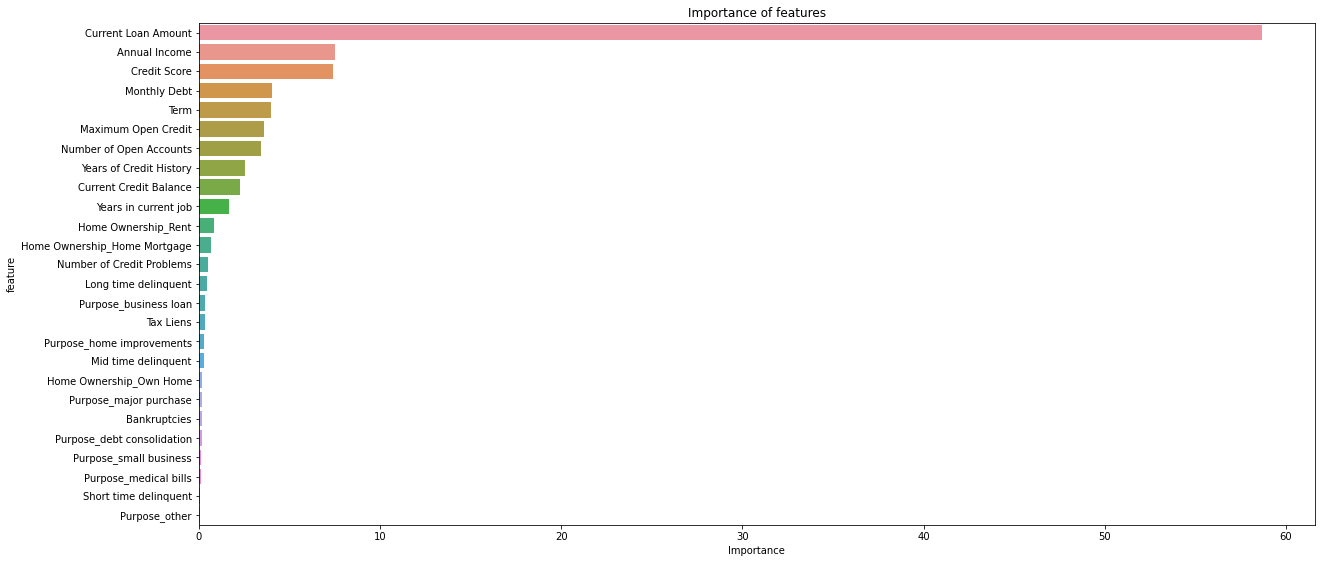

In [66]:
important_features_top = show_feature_importances(x_train.columns, final_model.feature_importances_, get_top=15)

### Балансировка тестового набора, обучение модели 

In [70]:
df_for_balancing = pd.concat([X_train_scaled, Y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, 'Credit Default')
    
df_balanced['Credit Default'].value_counts()

1    5382
0    5382
Name: Credit Default, dtype: int64

In [71]:
df_balanced['Annual Income'].isnull().value_counts()

False    10764
Name: Annual Income, dtype: int64

In [72]:
TARGET_NAME='Credit Default'
x_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

In [73]:
final_model.fit(x_train, y_train)

answers = final_model.predict(X_test_scaled)


In [75]:
answer=pd.DataFrame(data = answers, index = X_test_scaled.index, columns=['Credit Default']) 

In [76]:
answer

,Credit Default
0,1
1,1
2,1
3,0
4,1
...,...
2495,0
2496,0
2497,1
2498,1


In [77]:
answer.to_csv('AKonshin_predictions.csv',index=True, sep=';')